## Spectral graph analysis - Real Data

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from argparse import Namespace
from functools import reduce

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def fft(yt):
    n = len(yt) # length of the signal
    k = np.arange(n)
    T = n/2
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    # -------------
    FFTYT = np.fft.fft(yt)/n # fft computing and normalization
    FFTYT = FFTYT[range(n//2)]
    fftyt = abs(FFTYT)
    return frq, fftyt
    

## Real-world data

## FEDFormer

In [64]:
pred_init = np.load('/pred_files/real_world_data/FEDFormer/pred_-1.npy')
pred_0 = np.load('/pred_files/real_world_data/FEDFormer/pred_0.npy')
pred_1 = np.load('/pred_files/real_world_data/FEDFormer/pred_1.npy')
pred_2 = np.load('/pred_files/real_world_data/FEDFormer/pred_2.npy')
pred_3 = np.load('/pred_files/real_world_data/FEDFormer/pred_3.npy')
pred_4 = np.load('/pred_files/real_world_data/FEDFormer/pred_4.npy')
pred_5 = np.load('/pred_files/real_world_data/FEDFormer/pred_5.npy')

actual = np.load('/pred_files/real_world_data/FEDFormer/true.npy')

### Visualization per epoch

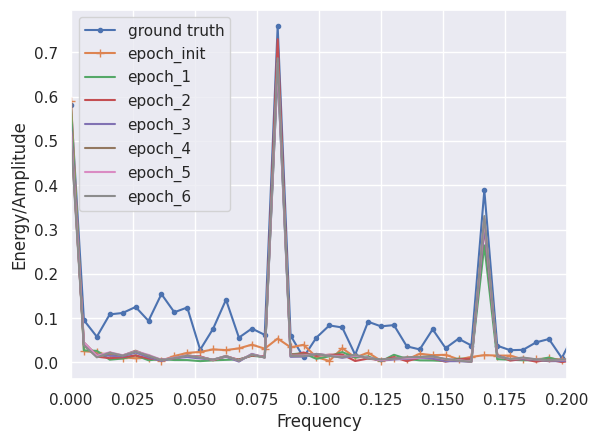

In [65]:
idx = 100
dim = 0

ts_init = pred_init[idx,:,dim]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,dim]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,dim]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,dim]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,dim]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,dim]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,dim]
freq5,energy5 = fft(ts5)

ts_actual = actual[idx,:,dim]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/real_world_data/FEDFormer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

## spectrum visualization: init, first, last

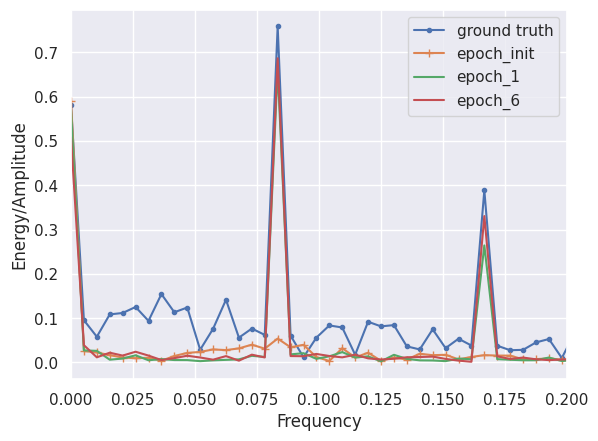

In [66]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq5,energy5)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_6'])

plt.xlim([0,0.2])

plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/real_world_data/FEDFormer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [67]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))

dim = 0
for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,dim]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,dim]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,dim]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,dim]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,dim]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,dim]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,dim]
  freq5,energy5 = fft(ts5)

  ts_actual = actual[idx,:,dim]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496

In [68]:
fed_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5}# 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_fed =  pd.DataFrame(fed_dict)
df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy
0,0.000000,0.281862,0.327966,0.291577,0.289545,0.288444,0.281989,0.284845,0.279650
1,0.005208,0.164962,0.015612,0.030411,0.031882,0.032504,0.035211,0.034892,0.032487
2,0.010417,0.088805,0.024995,0.020635,0.022553,0.021571,0.023191,0.023010,0.022125
3,0.015625,0.072719,0.012543,0.015602,0.017320,0.017761,0.020071,0.020175,0.019860
4,0.020833,0.079737,0.012432,0.012998,0.012938,0.013756,0.016777,0.017544,0.017343
...,...,...,...,...,...,...,...,...,...
187,0.973958,0.008597,0.002069,0.001900,0.001881,0.001441,0.001452,0.001336,0.001386
188,0.979167,0.007933,0.002086,0.001723,0.001410,0.001345,0.001315,0.001294,0.001316
189,0.984375,0.010646,0.002107,0.001455,0.001441,0.001379,0.001274,0.001283,0.001284
190,0.989583,0.010102,0.002117,0.002191,0.001654,0.001576,0.001507,0.001515,0.001549


In [69]:
x = df_fed.iloc[0:1, :]
y = df_fed.iloc[1:2, :]
sub_df_fed = pd.concat([x, y])
sub_df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy
0,0.000000,0.281862,0.327966,0.291577,0.289545,0.288444,0.281989,0.284845,0.279650
1,0.005208,0.164962,0.015612,0.030411,0.031882,0.032504,0.035211,0.034892,0.032487


In [70]:
def fed_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(6)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [71]:
fed_ratios = fed_ratio(sub_df_fed)
fed_ratios = fed_ratios.drop('frequency', axis=1)
fed_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio
0,1.163568,1.034468,1.027256,1.023349,1.000448,1.010580,0.992150
1,0.094642,0.184351,0.193272,0.197040,0.213451,0.211518,0.196936


In [72]:
low = fed_ratios.iloc[0, :]
high = fed_ratios.iloc[-1, :]

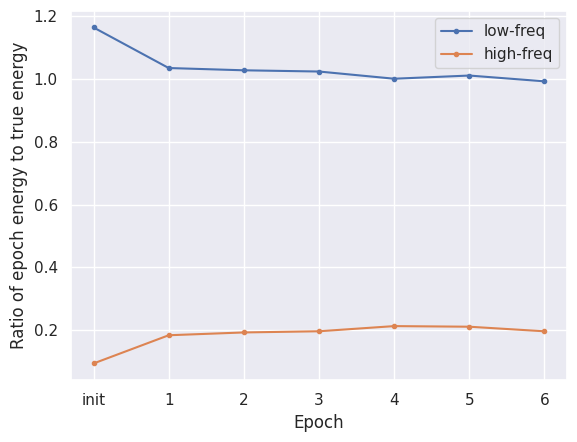

In [73]:
plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(fed_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5','6'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/real_world_data/FEDFormer/spectral_graphs/spectrum_ratio.png')
plt.show()

## AutoFormer

In [74]:
pred_init = np.load('/pred_files/real_world_data/Autoformer/pred_-1.npy')
pred_0 = np.load('/pred_files/real_world_data/Autoformer/pred_0.npy')
pred_1 = np.load('/pred_files/real_world_data/Autoformer/pred_1.npy')
pred_2 = np.load('/pred_files/real_world_data/Autoformer/pred_2.npy')
pred_3 = np.load('/pred_files/real_world_data/Autoformer/pred_3.npy')

actual = np.load('/pred_files/real_world_data/Autoformer/true.npy')

### Visualization per epoch

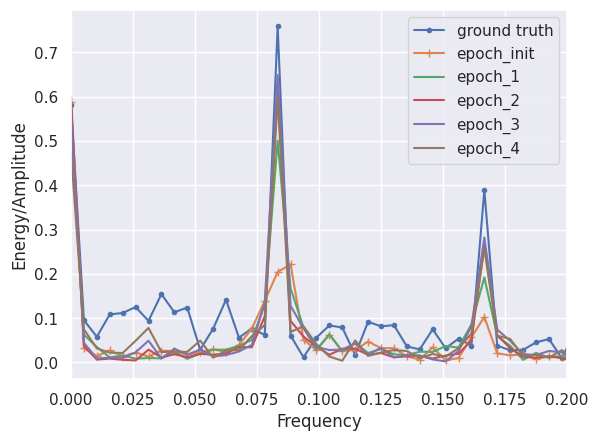

In [75]:
idx = 100
dim = 0

ts_init = pred_init[idx,:,dim]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,dim]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,dim]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,dim]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,dim]
freq3,energy3 = fft(ts3)

ts_actual = actual[idx,:,dim]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/real_world_data/Autoformer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

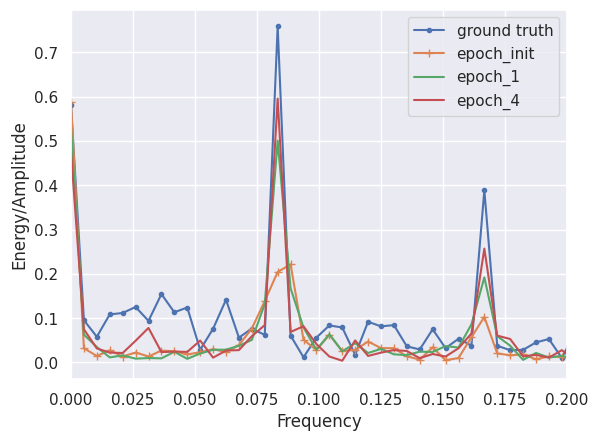

In [76]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq3,energy3)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_4'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/real_world_data/Autoformer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [77]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))

dim = 0
for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,dim]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,dim]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,dim]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,dim]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,dim]
  freq3,energy3 = fft(ts3)

  ts_actual = actual[idx,:,dim]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496

In [78]:
auto_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3}#, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8}

df_auto =  pd.DataFrame(auto_dict)
df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy
0,0.000000,0.281862,0.355160,0.277450,0.296811,0.300619,0.291244
1,0.005208,0.164962,0.026866,0.035707,0.043830,0.050267,0.061888
2,0.010417,0.088805,0.029779,0.024792,0.031212,0.042879,0.046711
3,0.015625,0.072719,0.017341,0.019527,0.028276,0.033160,0.036594
4,0.020833,0.079737,0.017691,0.016818,0.025894,0.029886,0.033947
...,...,...,...,...,...,...,...
187,0.973958,0.008597,0.002418,0.001491,0.001881,0.001884,0.001846
188,0.979167,0.007933,0.002441,0.001481,0.002175,0.001961,0.001979
189,0.984375,0.010646,0.002483,0.001460,0.002060,0.002135,0.002078
190,0.989583,0.010102,0.002715,0.002010,0.002596,0.002807,0.002618


In [79]:
x = df_auto.iloc[0:1, :]
y = df_auto.iloc[1:2, :]
sub_df_auto = pd.concat([x, y])
sub_df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy
0,0.000000,0.281862,0.355160,0.277450,0.296811,0.300619,0.291244
1,0.005208,0.164962,0.026866,0.035707,0.043830,0.050267,0.061888


In [80]:
def auto_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(4)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [81]:
auto_ratios = auto_ratio(sub_df_auto)
auto_ratios = auto_ratios.drop('frequency', axis=1)
auto_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio
0,1.260047,0.984344,1.053034,1.066544,1.033283
1,0.162865,0.216459,0.265697,0.304722,0.375164


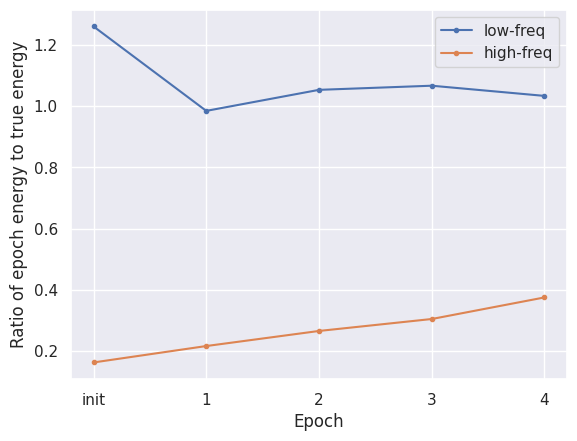

In [82]:
low = auto_ratios.iloc[0, :]
high = auto_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(auto_ratios.columns ,labels = ['init', '1', '2', '3', '4'])#, '5', '6', '7', '8', '9'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/real_world_data/Autoformer/spectral_graphs/spectrum_ratio.png')
plt.show()

### InFormer

In [83]:
pred_init = np.load('/pred_files/real_world_data/Informer/pred_-1.npy')
pred_0 = np.load('/pred_files/real_world_data/Informer/pred_0.npy')
pred_1 = np.load('/pred_files/real_world_data/Informer/pred_1.npy')
pred_2 = np.load('/pred_files/real_world_data/Informer/pred_2.npy')
pred_3 = np.load('/pred_files/real_world_data/Informer/pred_3.npy')
pred_4 = np.load('/pred_files/real_world_data/Informer/pred_4.npy')

actual = np.load('/pred_files/real_world_data/Informer/true.npy')

### Visualization per epoch

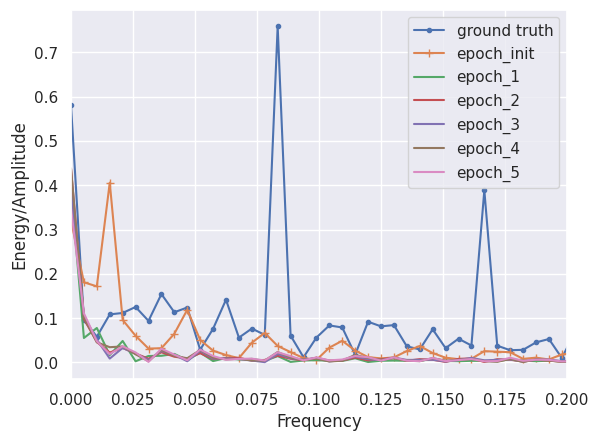

In [84]:
idx = 100
dim = 0

ts_init = pred_init[idx,:,dim]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,dim]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,dim]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,dim]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,dim]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,dim]
freq4,energy4 = fft(ts4)

ts_actual = actual[idx,:,dim]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/real_world_data/Informer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

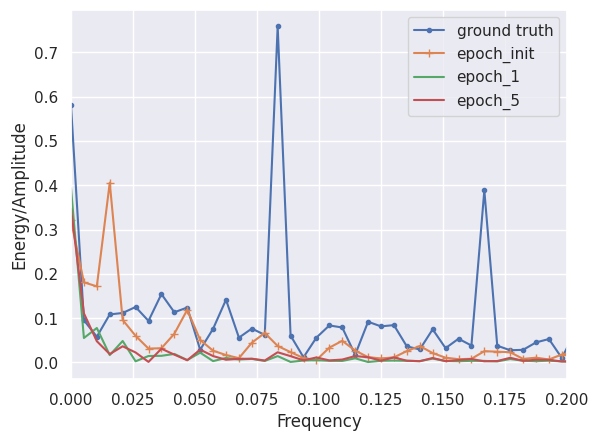

In [85]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq4,energy4)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_5'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/real_world_data/Informer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [86]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))

dim = 0
for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,dim]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,dim]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,dim]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,dim]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,dim]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,dim]
  freq4,energy4 = fft(ts4)

  ts_actual = actual[idx,:,dim]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496

In [87]:
inf_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4}#, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_inf =  pd.DataFrame(inf_dict)
df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy
0,0.000000,0.281862,0.344764,0.156794,0.162789,0.157996,0.187494,0.140565
1,0.005208,0.164962,0.174774,0.133786,0.194369,0.233068,0.241704,0.269330
2,0.010417,0.088805,0.216673,0.079949,0.107500,0.111051,0.111519,0.110054
3,0.015625,0.072719,0.394308,0.029632,0.053813,0.035421,0.027743,0.029716
4,0.020833,0.079737,0.125334,0.048512,0.062413,0.064970,0.068850,0.068987
...,...,...,...,...,...,...,...,...
187,0.973958,0.008597,0.003930,0.002381,0.002521,0.002850,0.002960,0.003181
188,0.979167,0.007933,0.005145,0.001872,0.002161,0.002423,0.002648,0.002607
189,0.984375,0.010646,0.004948,0.001882,0.001855,0.001576,0.001441,0.001599
190,0.989583,0.010102,0.005342,0.001906,0.002226,0.002454,0.002697,0.002640


In [88]:
x = df_inf.iloc[0:1, :]
y = df_inf.iloc[1:2, :]
sub_df_inf = pd.concat([x, y])
sub_df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy
0,0.000000,0.281862,0.344764,0.156794,0.162789,0.157996,0.187494,0.140565
1,0.005208,0.164962,0.174774,0.133786,0.194369,0.233068,0.241704,0.269330


In [89]:
def inf_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(5)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [90]:
inf_ratios = inf_ratio(sub_df_inf)
inf_ratios = inf_ratios.drop('frequency', axis=1)
inf_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio
0,1.223165,0.556279,0.577548,0.560544,0.665195,0.49870
1,1.059483,0.811013,1.178268,1.412864,1.465213,1.63268


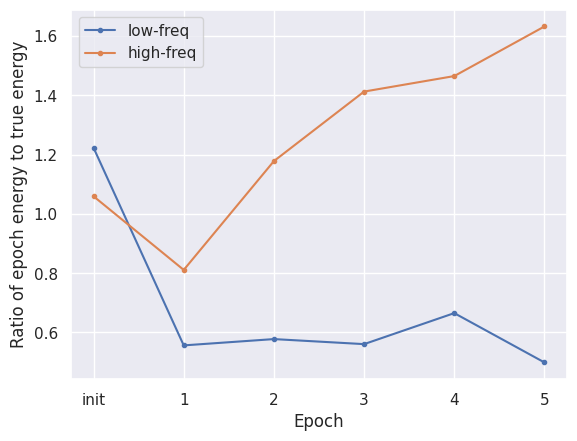

In [91]:
low = inf_ratios.iloc[0, :]
high = inf_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(inf_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5'])#, '6', '7', '8', '9', '10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/real_world_data/Informer/spectral_graphs/spectrum_ratio.png')
plt.show()